In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#Fashion-MNIST 
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. 


#Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

#Labels

Each training and test example is assigned to one of the following labels:

0.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


2
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143   9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197 206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179 183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174 175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197 193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213 214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90 135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36   0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 162 163 178 221 

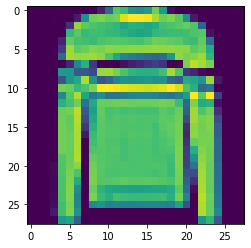

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[5])
print(training_labels[5])
print(training_images[5])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
len(training_images)

60000

In [7]:
len(test_images)

10000

2
[[0.         0.         0.         0.         0.00392157 0.         0.         0.         0.         0.08627451 0.34509804 0.7372549  0.6745098  0.51764706 0.49019608 0.55294118 0.78039216
  0.56078431 0.03529412 0.         0.         0.         0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.         0.07843137 0.51372549 0.78039216 0.80784314 0.76862745 0.79215686 0.94901961 1.         1.         0.98039216 0.87058824
  0.77254902 0.80784314 0.7372549  0.49411765 0.06666667 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.1372549  0.83921569 0.74901961 0.71764706 0.69803922 0.68627451 0.65882353 0.58823529 0.63529412 0.62352941 0.59607843 0.61960784
  0.70196078 0.71764706 0.74117647 0.76470588 0.7254902  0.32156863 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.

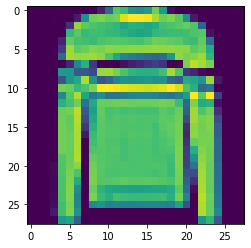

In [8]:
plt.imshow(training_images[5])
print(training_labels[5])
print(training_images[5])

In [9]:

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Computes the crossentropy loss between the labels and predictions.

In [11]:
model.fit(training_images, training_labels,epochs=5,verbose=1)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4964 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8907


In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8780


[0.33826324343681335, 0.878000020980835]

# Practise Sessions

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers.  what do those numbers represent? 

In [13]:
classifications = model.predict(test_images)

print(classifications[0])

[1.3649549e-06 2.0818654e-06 1.4542380e-07 1.6703547e-08 5.6025755e-07 4.5411889e-03 3.2605010e-07 2.5120826e-02 1.3004439e-05 9.7032052e-01]


With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [14]:
classifications

array([[1.3649549e-06, 2.0818654e-06, 1.4542380e-07, ..., 2.5120826e-02, 1.3004439e-05, 9.7032052e-01],
       [8.3086452e-06, 1.4226390e-10, 9.9722540e-01, ..., 2.0032444e-14, 7.3856903e-08, 6.6070192e-15],
       [8.6778350e-08, 9.9999988e-01, 1.6081261e-10, ..., 7.6938240e-20, 3.9884372e-12, 5.5562654e-14],
       ...,
       [1.0361066e-03, 4.6792149e-08, 1.3517920e-04, ..., 1.3674924e-07, 9.9784470e-01, 5.9156195e-09],
       [6.0636182e-08, 9.9999607e-01, 2.0655926e-09, ..., 2.8233018e-14, 4.1139731e-10, 1.6746962e-09],
       [6.2057929e-04, 2.7973394e-05, 7.5812062e-04, ..., 3.7193041e-02, 3.2644946e-02, 3.7224192e-04]], dtype=float32)

In [16]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [17]:
print(test_labels[0])

9


In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

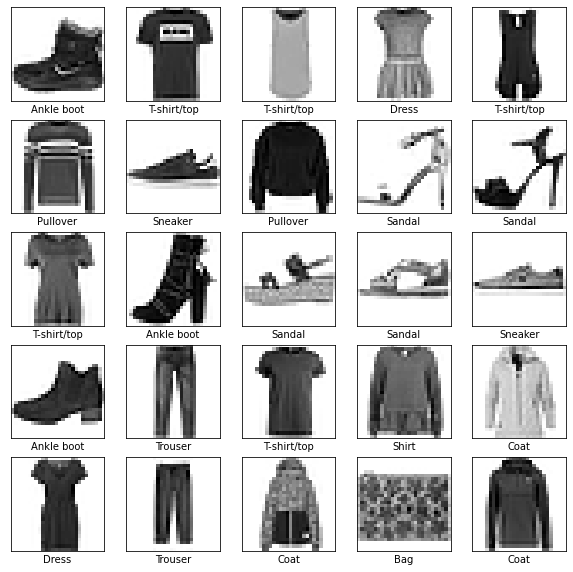

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

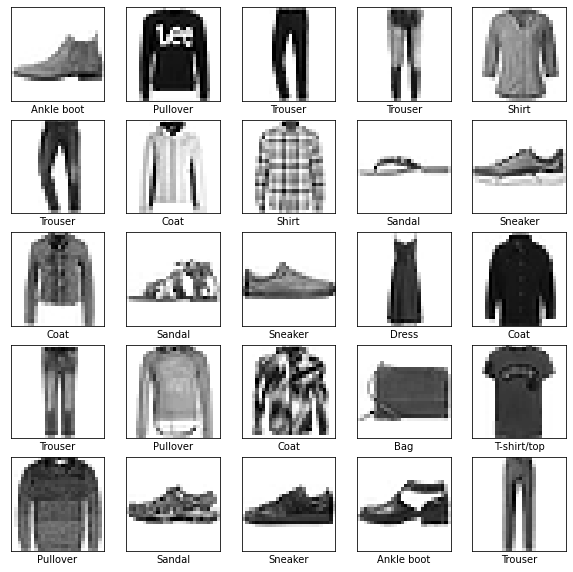

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

#Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

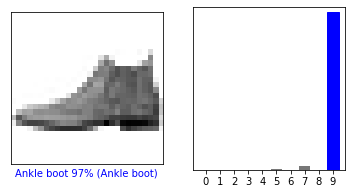

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  test_labels)
plt.show()

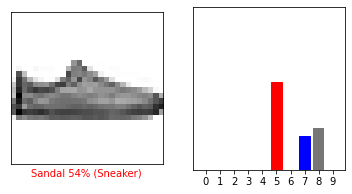

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  test_labels)
plt.show()

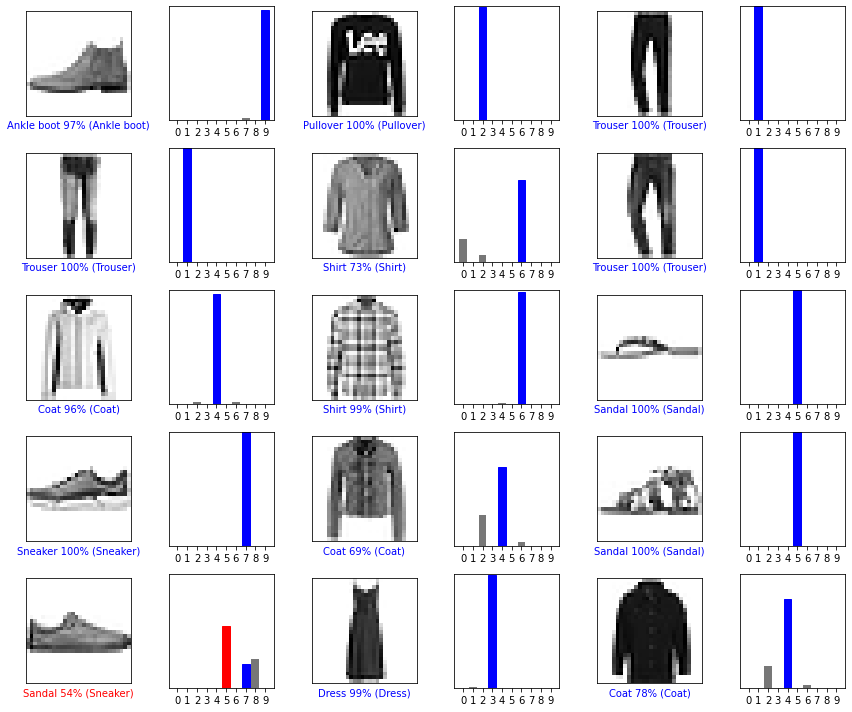

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, classifications[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, classifications[i], test_labels)
plt.tight_layout()
plt.show()

### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.



### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [25]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',metrics='accuracy')

model.fit(training_images, training_labels, epochs=5,verbose=1)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4733 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3571 - accuracy: 0.8694
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3215 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2973 - accuracy: 0.8900
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8807
[8.7601926e-08 3.9678894e-10 9.2444402e-08 1.7855840e-10 2.3743135e-08 2.6835068e-03 1.1855445e-07 1.5298214e-02 1.5632125e-07 9.8201776e-01]
9


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

1. model = tf.keras.models.Sequential()
2. model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
3. model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [28]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics='accuracy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5100 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3911 - accuracy: 0.8603
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3521 - accuracy: 0.8737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3295 - accuracy: 0.8806
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8686
[7.3553601e-05 9.4942276e-09 2.2699736e-05 1.6679708e-08 1.7574486e-05 1.1874416e-01 1.0377529e-04 1.4126751e-01 5.7520254e-05 7.3971319e-01]
9


##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [29]:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5,verbose=1)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: nan
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: nan
[nan nan nan nan nan]
9


##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',metrics='accuracy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4655 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3550 - accuracy: 0.8693
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3167 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.8903
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8728
[9.7675246e-09 1.2213401e-08 7.6826717e-10 9.1520175e-10 2.1716230e-10 1.7190879e-03 5.5153104e-09 1.0551560e-02 2.8819873e-09 9.8772931e-01]
9


#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',metrics='accuracy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4999 - accuracy: 0.8252
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8657
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3355 - accuracy: 0.8769
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8850
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8898
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2771 - accuracy: 0.8983
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9012
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9046
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2459 - accuracy: 0.9079
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237